In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

In [3]:
# data
df = pd.read_csv('../AnalysisData/all_data.csv')

In [15]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year
0,0,1950,9.3,23.90,158804397,37954
1,1,1951,9.8,25.08,160872264,40347
2,2,1952,10.0,26.90,163266026,43919
3,3,1953,9.7,28.76,165909996,47716
4,4,1954,9.2,29.73,168736390,50165


In [16]:
df['Sum of sales'] =df["Sales of cigarettes per adult per day"].rolling(15, min_periods=1).sum()

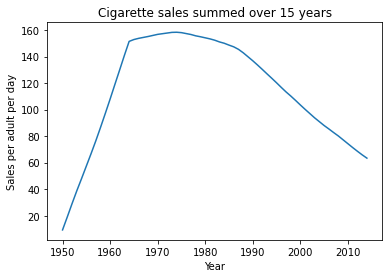

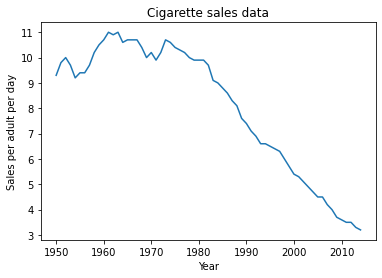

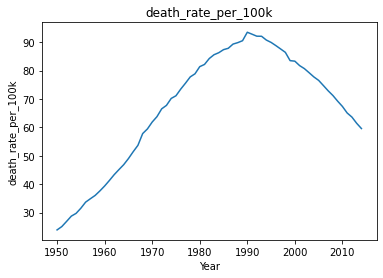

In [17]:

plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales summed over 15 years")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

plt.plot(df["Year"], df["Sales of cigarettes per adult per day"] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()


plt.plot(df["Year"], df["death_rate_per_100k"])
plt.title("death_rate_per_100k")
plt.xlabel("Year")
plt.ylabel("death_rate_per_100k")
plt.show()

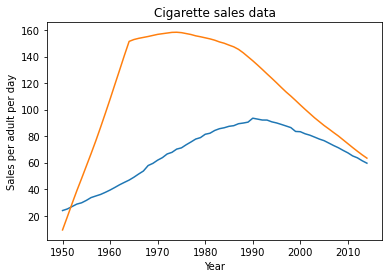

In [18]:
plt.plot(df["Year"], df["death_rate_per_100k"])
plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

In [19]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year,Sum of sales
0,0,1950,9.3,23.90,158804397,37954,9.3
1,1,1951,9.8,25.08,160872264,40347,19.1
2,2,1952,10.0,26.90,163266026,43919,29.1
3,3,1953,9.7,28.76,165909996,47716,38.8
4,4,1954,9.2,29.73,168736390,50165,48.0


In [35]:
input_data = {'N': len(df["deaths per year"]),
              'y': df["deaths per year"],
              'pop': df["Population"]}
model = CmdStanModel(stan_file='./stan_1.stan')
result = model.sample(data=input_data, 
                      chains = 4, 
                      seed=21370204)

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\DA_project\CommandFiles\stan_1.stan to exe file C:\STUFF\8th_semester\DA_project\CommandFiles\stan_1.exe
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/STUFF/8th_semester/DA_project/CommandFiles/stan_1.hpp C:/STUFF/8th_semester/DA_project/CommandFiles/stan_1.stan
Warning in 'C:/STUFF/8th_semester/DA_project/CommandFiles/stan_1.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/STUFF/8th_semester/DA_project/CommandFiles/stan_1.stan', line 24, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be 

ValueError: Unable to compile Stan model file: C:\STUFF\8th_semester\DA_project\CommandFiles\stan_1.stan.

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

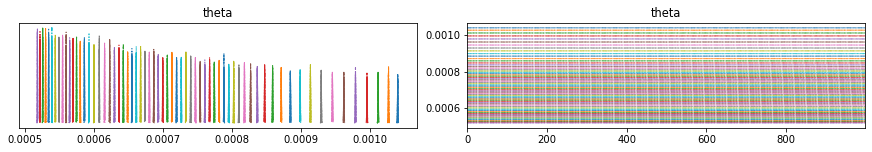

In [32]:
az.plot_trace(result,var_names=['theta'])

from this plot we can deduce that the deaths from cancer have only partial corellation with the population growth. Next thing to do is to add another predictor - consumption of cigarettes.